In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time
import ipywidgets

In [ ]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-02-07 06:13:14--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-02-07 06:13:14 (88.5 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [ ]:
n = len(data)

In [ ]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [ ]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [ ]:
denominator = n * sum_x2 - sum_x * sum_x

In [ ]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [ ]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

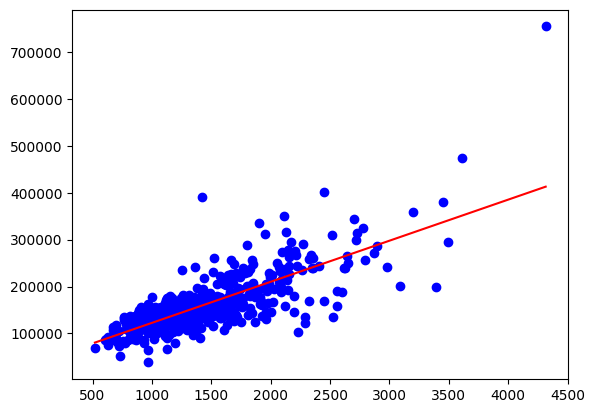

In [ ]:
plot_data(x,y,m,b)

# Training through Stochastic Gradient Descent (SGD)

In [ ]:
def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db



# Home work: Mini Batch Training

batch_size=032 i=000  dy_i = 37.21 * x + 18747.10     previously calculated: y_i = 87.69 * x + 34754.08    loss: 5822205611.184096
batch_size=032 i=001  dy_i = 54.81 * x + 28664.75     previously calculated: y_i = 87.69 * x + 34754.08    loss: 2335546276.017596
batch_size=032 i=002  dy_i = 64.37 * x + 34273.94     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1284780987.501420
batch_size=032 i=003  dy_i = 69.50 * x + 37511.52     previously calculated: y_i = 87.69 * x + 34754.08    loss: 968634197.233458
batch_size=032 i=004  dy_i = 72.21 * x + 39442.91     previously calculated: y_i = 87.69 * x + 34754.08    loss: 873451525.122100
batch_size=032 i=005  dy_i = 73.59 * x + 40654.19     previously calculated: y_i = 87.69 * x + 34754.08    loss: 844421314.790747
batch_size=032 i=006  dy_i = 74.22 * x + 41467.79     previously calculated: y_i = 87.69 * x + 34754.08    loss: 835032924.327508
batch_size=032 i=007  dy_i = 74.46 * x + 42061.05     previously calculated: y_i = 87.6

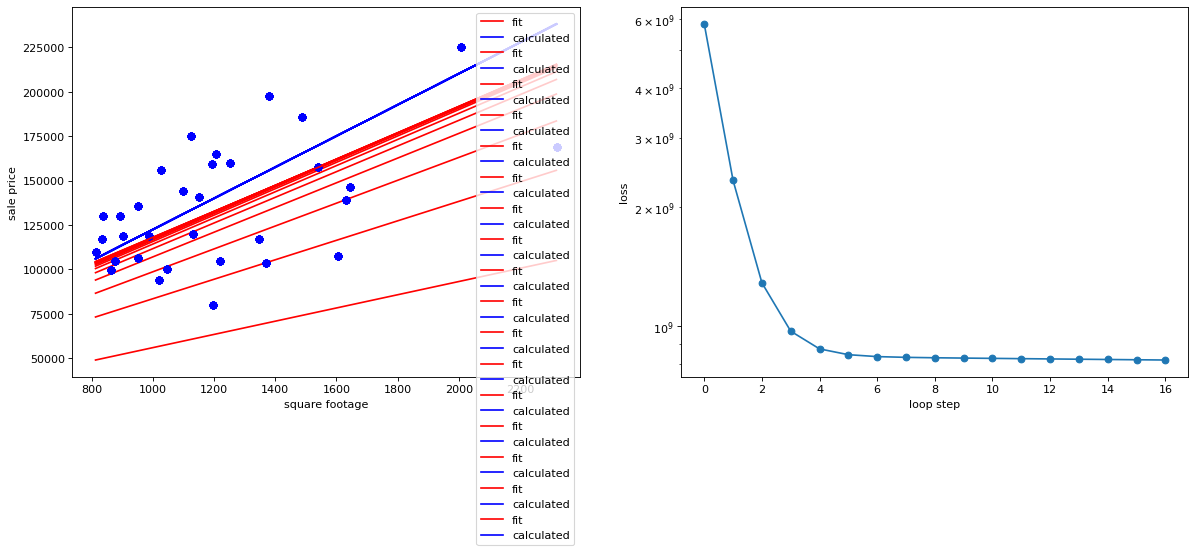

batch_size=064 i=000  dy_i = 75.01 * x + 46741.05     previously calculated: y_i = 87.69 * x + 34754.08    loss: 989320627.400657
batch_size=064 i=001  dy_i = 75.80 * x + 47762.71     previously calculated: y_i = 87.69 * x + 34754.08    loss: 974891625.987276
batch_size=064 i=002  dy_i = 75.98 * x + 48531.29     previously calculated: y_i = 87.69 * x + 34754.08    loss: 969335163.273710
batch_size=064 i=003  dy_i = 75.87 * x + 49178.06     previously calculated: y_i = 87.69 * x + 34754.08    loss: 965467649.812403
batch_size=064 i=004  dy_i = 75.62 * x + 49764.24     previously calculated: y_i = 87.69 * x + 34754.08    loss: 961897487.081962
batch_size=064 i=005  dy_i = 75.31 * x + 50318.43     previously calculated: y_i = 87.69 * x + 34754.08    loss: 958399217.254240
batch_size=064 i=006  dy_i = 74.98 * x + 50854.02     previously calculated: y_i = 87.69 * x + 34754.08    loss: 954958228.929053
batch_size=064 i=007  dy_i = 74.64 * x + 51377.29     previously calculated: y_i = 87.69 *

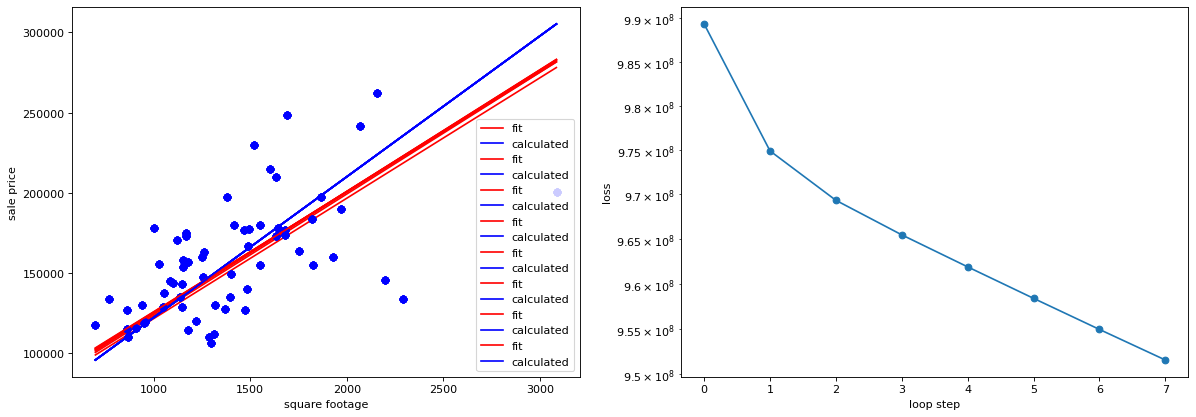

batch_size=128 i=000  dy_i = 75.41 * x + 51364.71     previously calculated: y_i = 87.69 * x + 34754.08    loss: 924865027.145564
batch_size=128 i=001  dy_i = 75.82 * x + 51236.40     previously calculated: y_i = 87.69 * x + 34754.08    loss: 923435496.480298
batch_size=128 i=002  dy_i = 76.07 * x + 51060.22     previously calculated: y_i = 87.69 * x + 34754.08    loss: 922660605.796037
batch_size=128 i=003  dy_i = 76.26 * x + 50865.50     previously calculated: y_i = 87.69 * x + 34754.08    loss: 922054286.827357


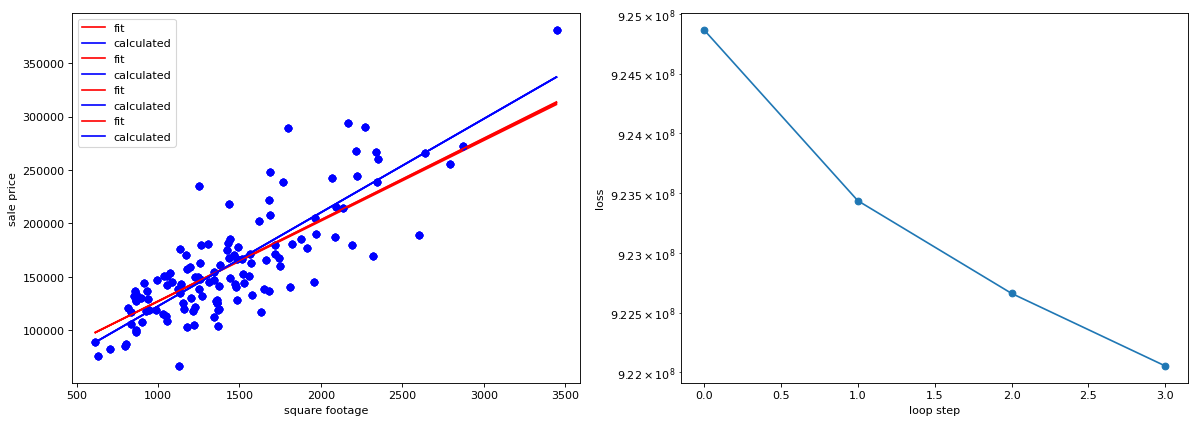

batch_size=256 i=000  dy_i = 78.13 * x + 50871.33     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1788068203.612315
batch_size=256 i=001  dy_i = 79.15 * x + 50590.30     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1779319062.126040


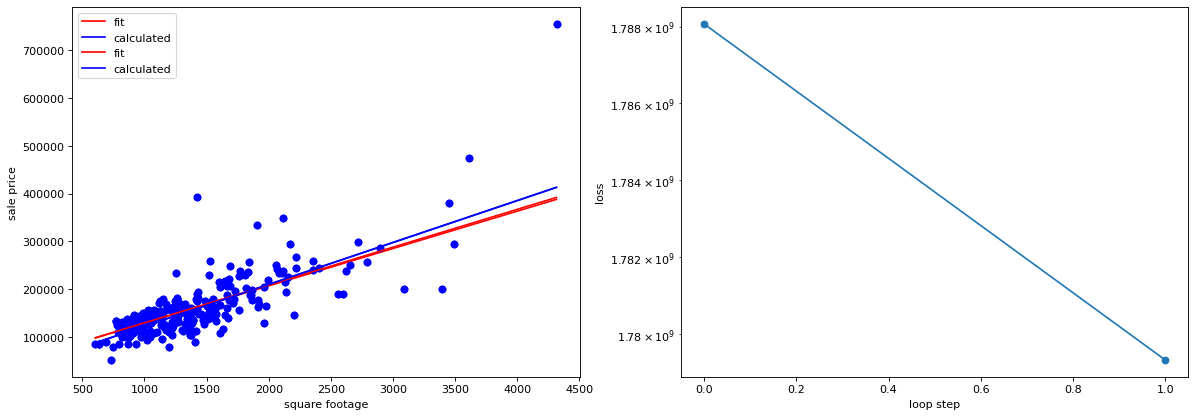

batch_size=512 i=000  dy_i = 78.38 * x + 49930.74     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1467368880.345567


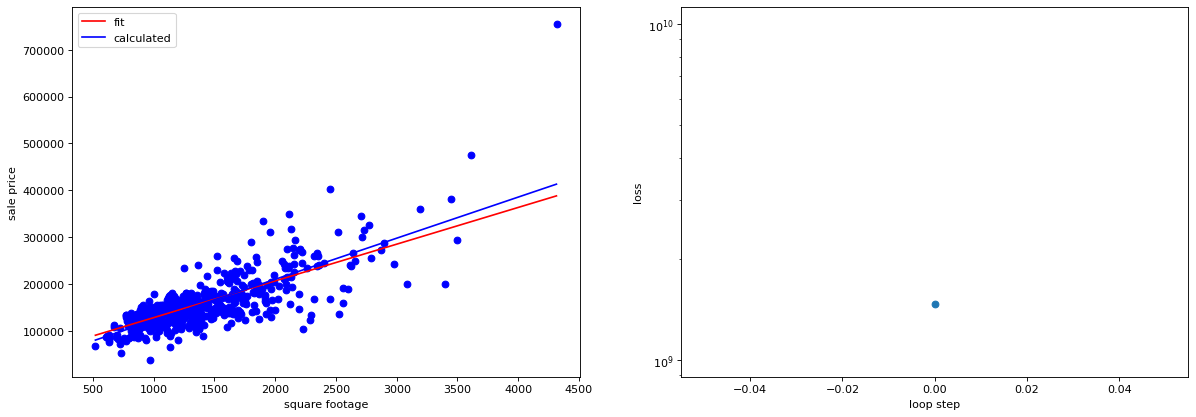

In [ ]:
# set our initial slope and intercept
m = 5.
b = 1000.


batch_sizes = [32, 64, 128, 256, 512]

# Store all plots in a dictionary
all_plots = {}

for batch_size in batch_sizes:
    # set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    # we run our loop N times
    loop_N = 1 * (len(data['GrLivArea']) // batch_size)

    # create a 1 by 2 plot grid
    fig, ax = plt.subplots(1, 2, figsize=(18, 6), dpi=80)

    for i in range(loop_N):
        # update our slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x, data_y, m, b))

        # keep a history of our loss values
        loss_history.append(loss_value)

        # print our progress
        print('batch_size=%03d i=%03d  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (batch_size, i, m, b, m_calc, b_calc, loss_value))


        # plot our usual output
        plot_data(data_x, data_y, m, b, ax[0])

        # plot the calculated linear fit for comparison
        line_x = np.arange(data_x.min(), data_x.max())
        line_y = line_x * m_calc + b_calc
        ax[0].plot(line_x, line_y, 'b-', label='calculated')

    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss
    loss_x = np.arange(0, len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x, loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')

    # store the current batch plots in the dictionary
    all_plots[batch_size] = (fig, ax)

    # show the plot temporarily (remove if you want to plot all at once)
    plt.show()
    time.sleep(0.5)  # remove this if you want to plot all at once

# Plot all stored plots at the end
for batch_size, (fig, ax) in all_plots.items():
    # Customize title and show the plot
    fig.suptitle(f"Batch Size: {batch_size}")
    plt.show()


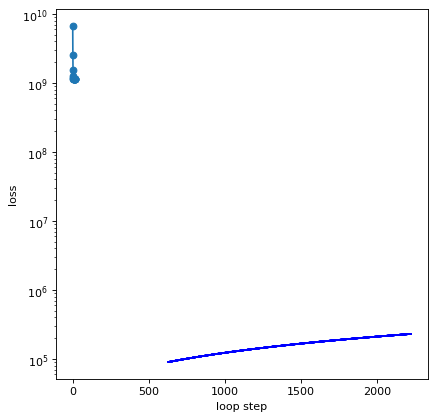

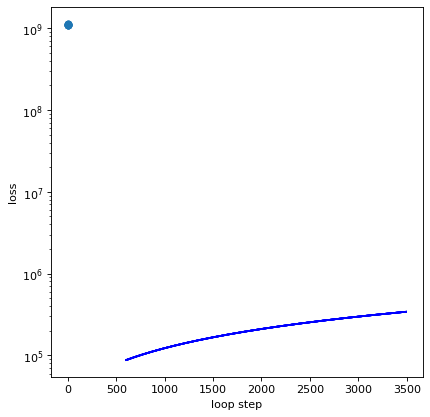

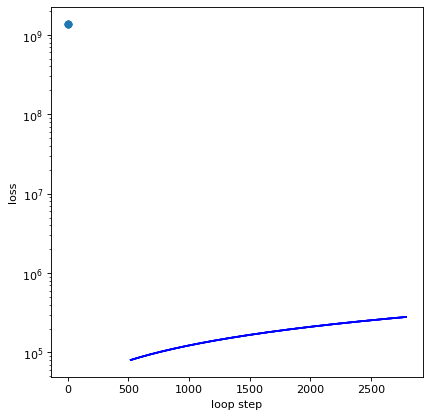

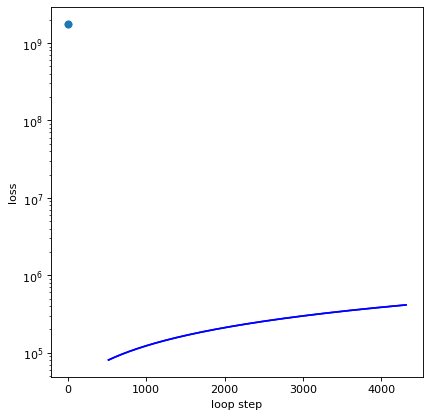

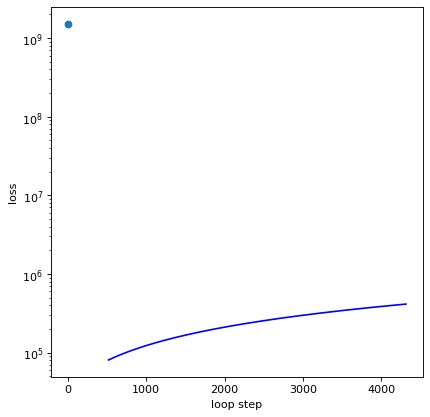

In [ ]:
# set our initial slope and intercept
m = 5.
b = 1000.


batch_sizes = [32, 64, 128, 256, 512]

# Store all plots in a dictionary
all_plots = {}

for batch_size in batch_sizes:
    # set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1
    # use these to plot our progress over time
    loss_history = []
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_batch = data.sample(batch_size)
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()
    # we run our loop N times
    loop_N = 1 * (len(data['GrLivArea']) // batch_size)

    # create a 1 by 2 plot grid
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=80)

    for i in range(loop_N):
        # update our slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x, data_y, m, b))

        # keep a history of our loss values
        loss_history.append(loss_value)

        # print our progress
        #print('batch_size=%03d i=%03d  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (batch_size, i, m, b, m_calc, b_calc, loss_value))


        # plot our usual output
        #plot_data(data_x, data_y, m, b, ax[0])

        # plot the calculated linear fit for comparison
        line_x = np.arange(data_x.min(), data_x.max())
        line_y = line_x * m_calc + b_calc
        ax.plot(line_x, line_y, 'b-', label='calculated')


    # plot the loss
    loss_x = np.arange(0, len(loss_history))
    loss_y = np.asarray(loss_history)
    ax.plot(loss_x, loss_y, 'o-')
    ax.set_yscale('log')
    ax.set_xlabel('loop step')
    ax.set_ylabel('loss')

    # store the current batch plots in the dictionary
    all_plots[batch_size] = (fig, ax)

    # show the plot temporarily (remove if you want to plot all at once)
    plt.show()
    time.sleep(0.5)  # remove this if you want to plot all at once

# Plot all stored plots at the end
for batch_size, (fig, ax) in all_plots.items():
    # Customize title and show the plot
    fig.suptitle(f"Batch Size: {batch_size}")
    plt.show()

In [ ]:
def calculate_accuracy(data_x, data_y, m, b):
    y_predicted = model(data_x, m, b)
    # Assuming binary classification, use accuracy metric
    accuracy = np.mean((y_predicted > 0.5) == (data_y > 0.5))
    return accuracy

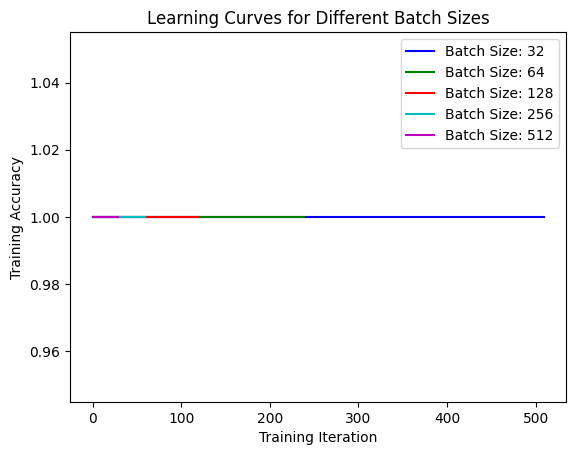

'\n# Plot loss curves\nfor i, batch_size in enumerate(batch_sizes):\n    plt.plot(range(len(loss_histories[batch_size])), loss_histories[batch_size],\n             label=f"Batch Size: {batch_size}", color=colors[i])\n\nplt.xlabel("Training Iteration")\nplt.ylabel("Loss")\nplt.title("Loss Curves for Different Batch Sizes")\nplt.yscale(\'log\')\nplt.legend()\nplt.show()'

In [ ]:
training_accuracies = {}
loss_histories = {}

batch_sizes = [32, 64, 128, 256, 512]

for batch_size in batch_sizes:
    training_accuracies[batch_size] = []
    loss_histories[batch_size] = []

    # set a learning rate for each parameter
    learning_rate_m = 1e-7
    learning_rate_b = 1e-1

    # we run our loop N times
    loop_N = 30 * (len(data['GrLivArea']) // batch_size)

    for i in range(loop_N):

        # update our slope and intercept based on the current values
        m = updated_m(data_x, data_y, m, b, learning_rate_m)
        b = updated_b(data_x, data_y, m, b, learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x, data_y, m, b))

        # keep a history of our loss values
        loss_history.append(loss_value)

        # calculate loss
        loss_value = np.mean(loss(data_x, data_y, m, b))
        loss_histories[batch_size].append(loss_value)

        # calculate training accuracy on hold-out data (replace with validation set if available)
        data_batch_temp = data.sample(frac=0.2)  # Sample 20% for validation
        data_x_temp = data_batch_temp['GrLivArea'].to_numpy()
        data_y_temp = data_batch_temp['SalePrice'].to_numpy()
        accuracy = calculate_accuracy(data_x_temp, data_y_temp, m, b)
        training_accuracies[batch_size].append(accuracy)


# Plot learning curves
colors = ['b', 'g', 'r', 'c', 'm']
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(len(training_accuracies[batch_size])), training_accuracies[batch_size],
             label=f"Batch Size: {batch_size}", color=colors[i])

plt.xlabel("Training Iteration")
plt.ylabel("Training Accuracy")
plt.title("Learning Curves for Different Batch Sizes")
plt.legend()
plt.show()
'''
# Plot loss curves
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(len(loss_histories[batch_size])), loss_histories[batch_size],
             label=f"Batch Size: {batch_size}", color=colors[i])

plt.xlabel("Training Iteration")
plt.ylabel("Loss")
plt.title("Loss Curves for Different Batch Sizes")
plt.yscale('log')
plt.legend()
plt.show()'''